In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [2]:
# Load data
train_data = pd.read_csv('./train.csv')
test_data  = pd.read_csv('./test.csv')

Ok. Let's take a look at the challenge page and learn about the data.
<img src="images/01.png" width="800"/>

In [3]:
# Look at the first 20 samples of the training dataset
train_data.head(20)
# ... for create a first idea about the problem.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
# Quality of training data
print(f'Total samples: {len(train_data)}')
train_data.isnull().sum()

Total samples: 891


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Quality of testing data
print(f'Total samples: {len(test_data)}')
test_data.isnull().sum()

Total samples: 418


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

We have problem with Age, Cabin and Embarked in training data, and with Age, Fare and Cabin in the testing data. We have to handle Age, Cabin, Fare and Embarked nan values in some moment.

After analyse the date, we're going to perform some transformations. They are:

- Action 01: Change the string column to a numerical one;
- Action 02: Embarked will be spread into three columns: (C, S and Q);
- Action 03: Splitting the name column into surname and title columns;
- Action 04: Title to dummy, with Mr, Miss, Mrs, Master and Others;
- Action 05: Fill null age values (Age, Cabin and Embarked);
- Action 06: Check it all the values are unique;
- Action 07: Remove unnecessary columns


In [6]:
# Action 01: Change the string column to a numerical one
train_data['Sex'] = train_data['Sex'].replace({'male': 0, 'female': 1})
test_data['Sex']  = test_data['Sex'] .replace({'male': 0, 'female': 1})


In [7]:
# Action 02: Embarked is spread into three columns (C, S and Q)
dummy_embarked_train = pd.get_dummies(train_data['Embarked'], prefix='Emb')
train_data = pd.concat([train_data, dummy_embarked_train], axis=1)
train_data.drop(['Embarked'], axis=1, inplace=True)

dummy_embarked_test = pd.get_dummies(test_data['Embarked'], prefix='Emb')
test_data = pd.concat([test_data, dummy_embarked_test], axis=1)
test_data.drop(['Embarked'], axis=1, inplace=True)

# Como as colunas dummy representam a coluna 'Embarked', não devem haver valores ausentes.
# No entanto, se houver algum valor ausente, você pode preencher com 0, assumindo que a ausência de 1 indica que o passageiro não embarcou naquele porto específico.

train_data['Emb_C'].fillna(0, inplace=True)
train_data['Emb_Q'].fillna(0, inplace=True)
train_data['Emb_S'].fillna(0, inplace=True)

test_data['Emb_C'].fillna(0, inplace=True)
test_data['Emb_Q'].fillna(0, inplace=True)
test_data['Emb_S'].fillna(0, inplace=True)



In [8]:
# Action 03: Splitting the name column into surname and title columns
# Split the Name column into Surname and Title.
train_data['Surname'] = train_data['Name'].str.split(',').str[0]
train_data['Title']   = train_data['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
test_data['Surname']  = test_data ['Name'].str.split(',').str[0]
test_data['Title']    = test_data ['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

# Drop the unnecessary column.
train_data = train_data.drop('Name', axis=1)
test_data  = test_data .drop('Name', axis=1)

train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Emb_C,Emb_Q,Emb_S,Surname,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,Braund,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,Cumings,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Heikkinen,Miss
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,Futrelle,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,1,Allen,Mr


In [9]:
train_data['Surname'].value_counts()

# ... it doesn't seem to matter. We will drop the surname column

Andersson    9
Sage         7
Panula       6
Skoog        6
Carter       6
            ..
Hanna        1
Lewy         1
Mineff       1
Haas         1
Dooley       1
Name: Surname, Length: 667, dtype: int64

In [10]:
train_data.drop('Surname', axis=1, inplace=True)
test_data .drop('Surname', axis=1, inplace=True)

In [11]:
# Count the unique values of title column
title_counts = train_data['Title'].value_counts()

print(title_counts)
# ... it seems relevant. We will keep it. But...

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64


In [12]:
# But it could be better if we group all the titles are not Mr, Miss, Mrs, Master, Dr and Rev.
titles_to_keep = [ "Mr", "MIss", "Mrs", "Master"]

train_data["Title"] = train_data["Title"].apply(lambda x: x if x in titles_to_keep else "Others")
test_data["Title"]  = test_data["Title"] .apply(lambda x: x if x in titles_to_keep else "Others")

In [13]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Emb_C,Emb_Q,Emb_S,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,Mr
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,Mrs
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Others
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,Mrs
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,1,Mr


In [14]:
# Action 04: Title to dummy, with Mr, Miss, Mrs, Master and Others
print("--------------------")
# Checking the results
print(train_data['Title'].value_counts())

dummy_title = pd.get_dummies(train_data['Title'], prefix="Title")
train_data = pd.concat([train_data, dummy_title], axis=1)
train_data = train_data.drop('Title', axis=1)

dummy_title_test = pd.get_dummies(test_data['Title'], prefix="Title")
test_data = pd.concat([test_data, dummy_title_test], axis=1)
test_data = test_data.drop('Title', axis=1)

--------------------
Mr        517
Others    209
Mrs       125
Master     40
Name: Title, dtype: int64


In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Emb_C,Emb_Q,Emb_S,Title_Master,Title_Mr,Title_Mrs,Title_Others
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0,0,1,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,0,0,1,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0


In [16]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Sex           891 non-null    int64  
 4   Age           714 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Ticket        891 non-null    object 
 8   Fare          891 non-null    float64
 9   Cabin         204 non-null    object 
 10  Emb_C         891 non-null    uint8  
 11  Emb_Q         891 non-null    uint8  
 12  Emb_S         891 non-null    uint8  
 13  Title_Master  891 non-null    uint8  
 14  Title_Mr      891 non-null    uint8  
 15  Title_Mrs     891 non-null    uint8  
 16  Title_Others  891 non-null    uint8  
dtypes: float64(2), int64(6), object(2), uint8(7)
memory usage: 75.8+ KB


In [17]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Pclass        418 non-null    int64  
 2   Sex           418 non-null    int64  
 3   Age           332 non-null    float64
 4   SibSp         418 non-null    int64  
 5   Parch         418 non-null    int64  
 6   Ticket        418 non-null    object 
 7   Fare          417 non-null    float64
 8   Cabin         91 non-null     object 
 9   Emb_C         418 non-null    uint8  
 10  Emb_Q         418 non-null    uint8  
 11  Emb_S         418 non-null    uint8  
 12  Title_Master  418 non-null    uint8  
 13  Title_Mr      418 non-null    uint8  
 14  Title_Mrs     418 non-null    uint8  
 15  Title_Others  418 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(7)
memory usage: 32.4+ KB


In [18]:
# Action 05: Fill null age values (Age, Cabin and Embarked);
def fill_age(row, age_medians):
    if pd.isnull(row['Age']):
        # Check if the key exists in the age_medians Series
        if (row['Pclass'], row['Sex']) in age_medians.index:
            return age_medians[row['Pclass'], row['Sex']]
        else:
            # If the key doesn't exist, you can return a default value or handle it as needed
            # Here we return the median age of all passengers as a default
            return train_data['Age'].median()
    else:
        return row['Age']

# Applying the function to train_data
age_medians = train_data.groupby(['Pclass', 'Sex'])['Age'].median()
train_data['Age'] = train_data.apply(lambda row: fill_age(row, age_medians), axis=1)

# Applying the function to test_data
test_data['Age'] = test_data.apply(lambda row: fill_age(row, age_medians), axis=1)




In [19]:
# Calcular a média da tarifa para cada classe no conjunto de treinamento
fare_means = train_data.groupby('Pclass')['Fare'].mean()

# Definir uma função para preencher os valores ausentes de Fare com base na média da classe correspondente
def fill_fare(row):
    if pd.isnull(row['Fare']):
        return fare_means[row['Pclass']]
    else:
        return row['Fare']

# Aplicar a função para preencher os valores ausentes de Fare no conjunto de treinamento e de teste
train_data['Fare'] = train_data.apply(lambda row: fill_fare(row), axis=1)
test_data['Fare'] = test_data.apply(lambda row: fill_fare(row), axis=1)


In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Emb_C,Emb_Q,Emb_S,Title_Master,Title_Mr,Title_Mrs,Title_Others
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0,0,1,0
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,0,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,0,0,1,0,0,1,0
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0


In [21]:
# Action 06: Check it all the values are unique
print("IDs únicos:", train_data['PassengerId'].nunique() == len(train_data))


IDs únicos: True


In [22]:
# Action 07: Remove unnecessary columns
train_data.drop(['PassengerId', 'Cabin', 'Ticket'], axis=1, inplace=True)
test_data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [23]:
train_data.describe().style.background_gradient()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Title_Master,Title_Mr,Title_Mrs,Title_Others
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.112424,0.523008,0.381594,32.204208,0.188552,0.086420,0.722783,0.044893,0.580247,0.140292,0.234568
std,0.486592,0.836071,0.477990,13.304424,1.102743,0.806057,49.693429,0.391372,0.281141,0.447876,0.207186,0.493796,0.347485,0.423966
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.500000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,0.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


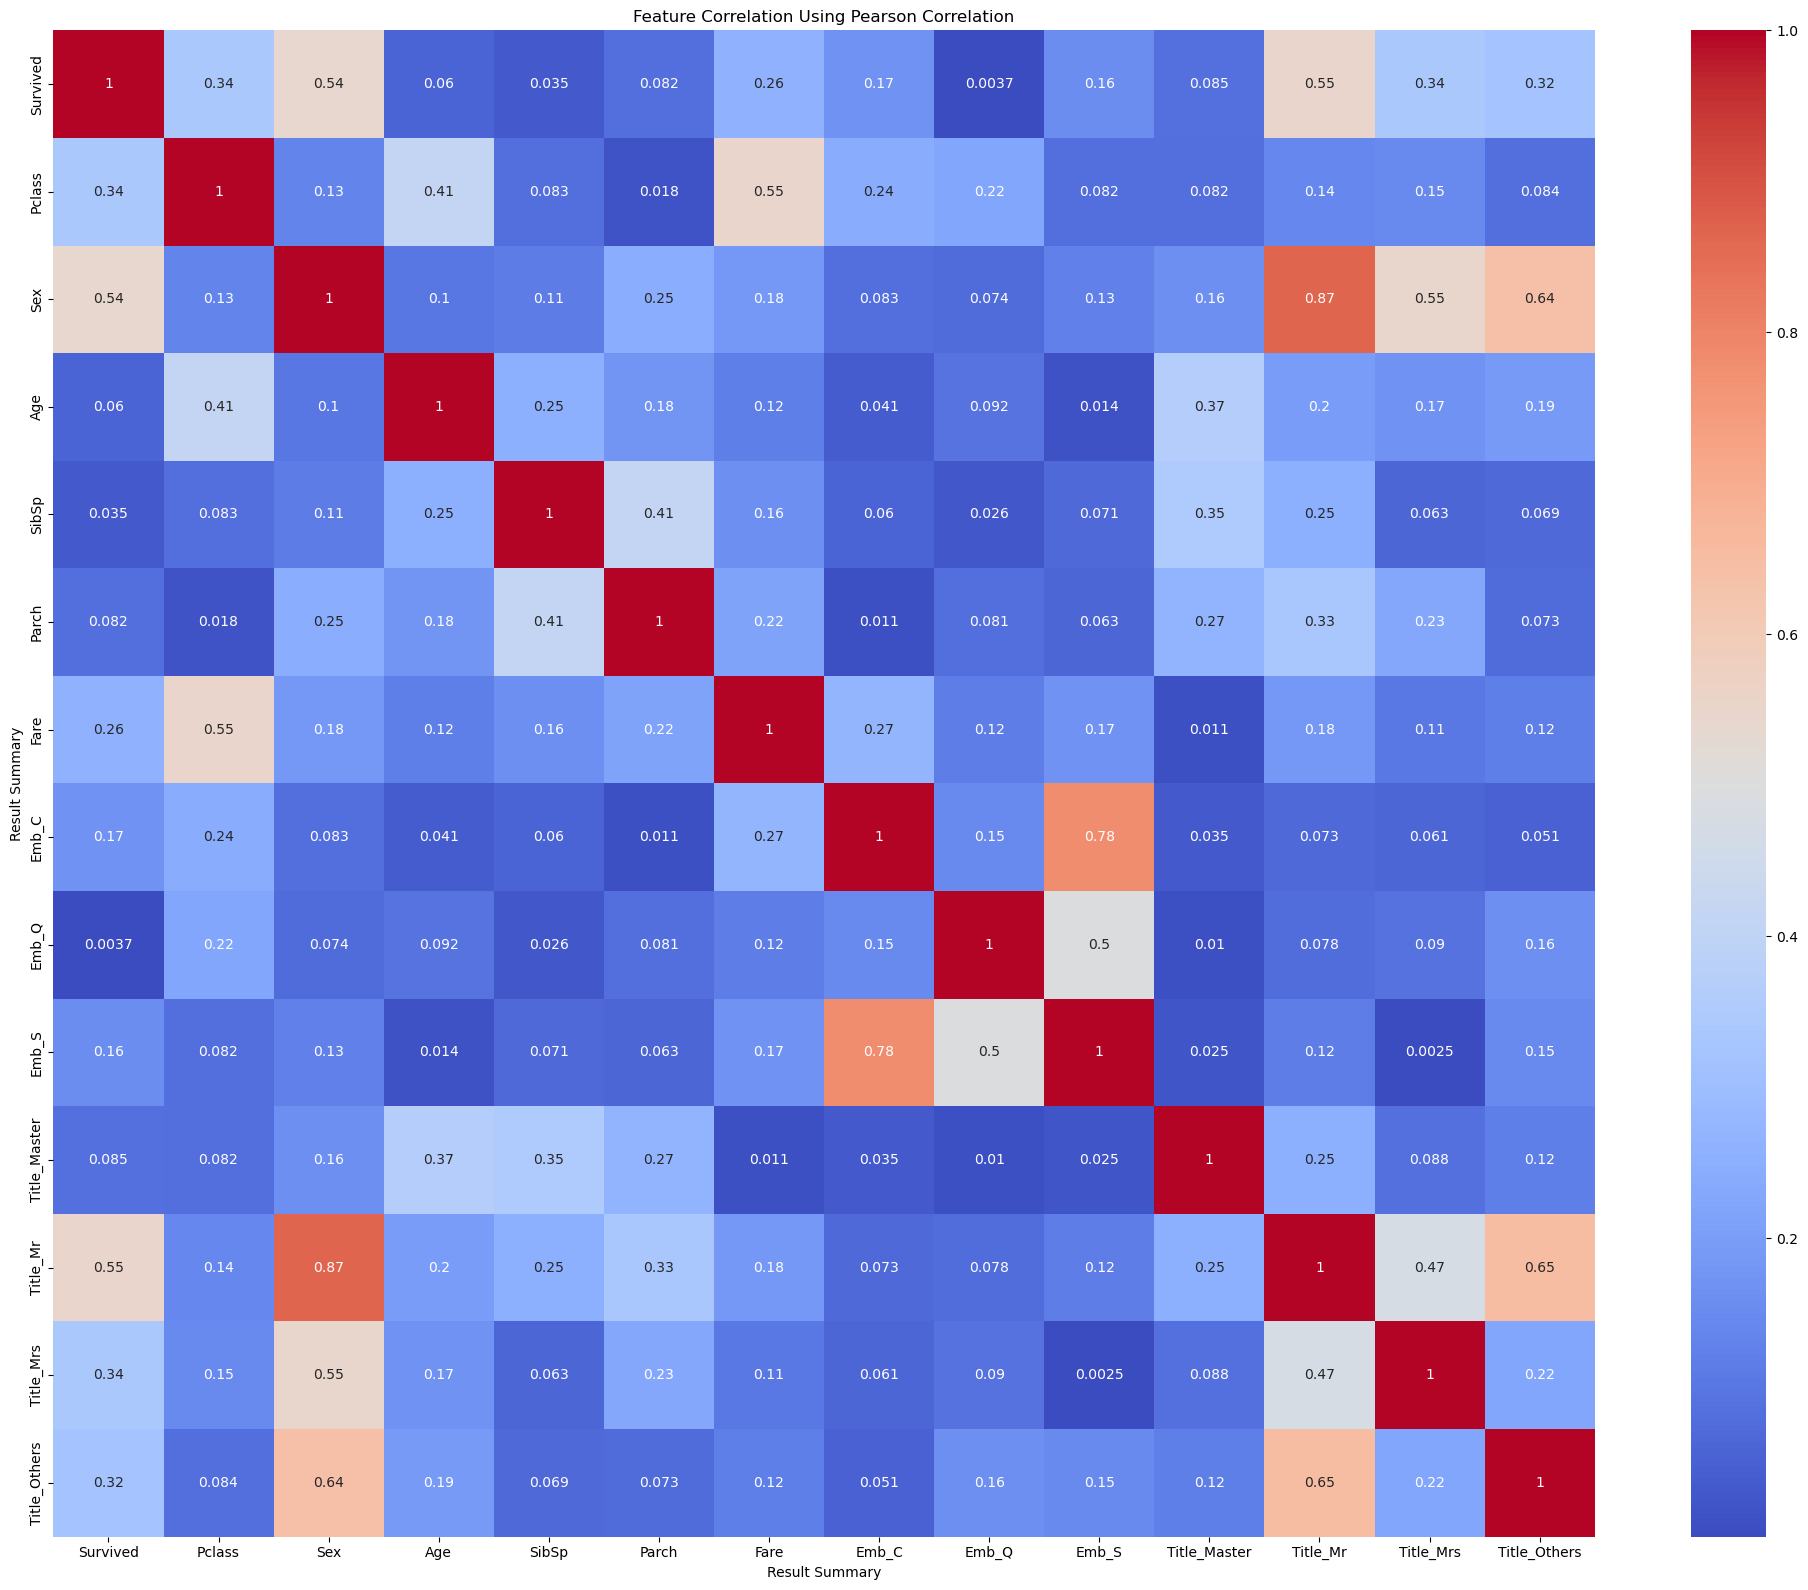

In [24]:
# Let's try to identify some possible correlations between features
corr_matrix = train_data.corr().abs()
fig= plt.figure(figsize = (20, 16))
ax=sns.heatmap(corr_matrix, cmap="coolwarm",annot=True)
ax.set(xlabel ="Result Summary", ylabel = "Result Summary", title ='Feature Correlation Using Pearson Correlation')
plt.tight_layout()

I couldn't see any features correlations. Let's see correlations between each feature and the target.

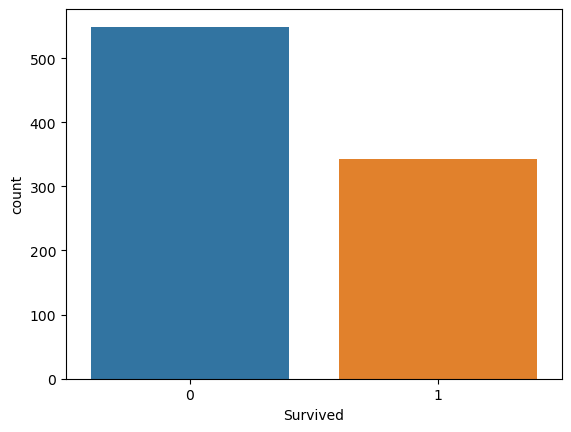

In [25]:
# Survided x Not Survived
# Most people doesn't survived.
sns.countplot(x='Survived', data=train_data)
plt.show()

<Axes: >

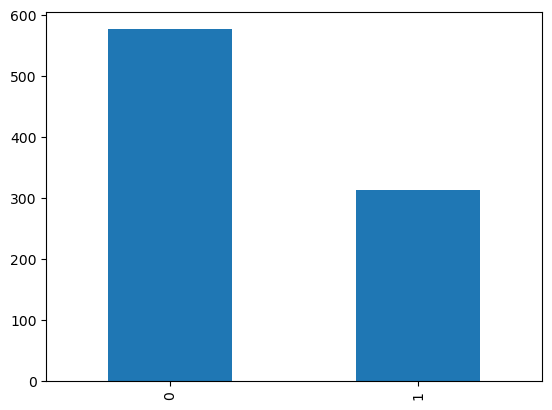

In [26]:
# Male x Female
train_data['Sex'].value_counts().plot.bar()

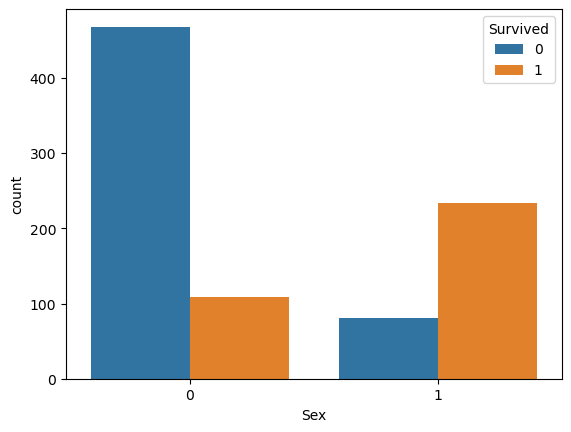

In [27]:
# Sex x Survived
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.show()

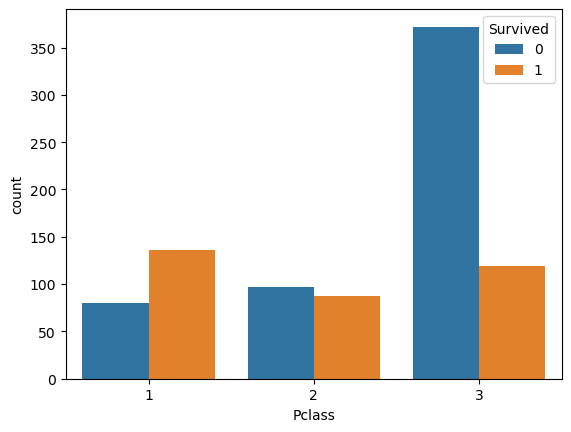

In [28]:
# Class x Survived
sns.countplot(x='Pclass', hue='Survived', data=train_data)
plt.show()

<Axes: xlabel='Pclass'>

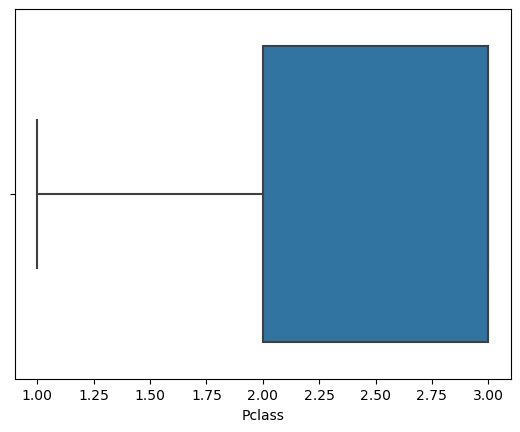

In [29]:
# Class proportion
sns.boxplot(x='Pclass', data=train_data)


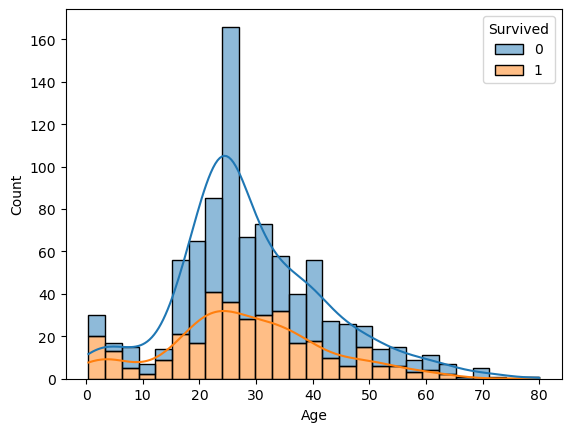

In [30]:
# Histogram of survived by age
sns.histplot(x='Age', hue='Survived', multiple="stack", data=train_data, kde=True)
plt.show()



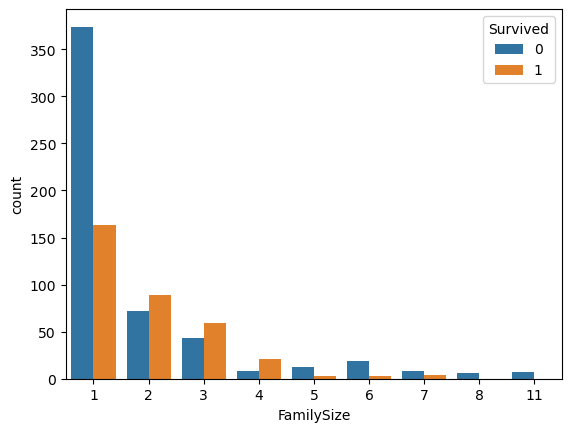

In [31]:
# Countplot about the family size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize']  = test_data['SibSp']  + test_data['Parch']  + 1
sns.countplot(x='FamilySize', hue='Survived', data=train_data)
plt.show()


There is a hypothesis. If a person is Adult, Class C and Man, he did probably not survived. And if is a child and woman, probably survived.

In [32]:
# Define age groups
def age_group(age):
    if age <= 12:
        return 'Child'
    elif age <= 18:
        return 'Teen'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to create a new age group column
train_data['AgeGroup'] = train_data['Age'].apply(age_group)
test_data['AgeGroup'] = test_data['Age'].apply(age_group)

# Map the gender to strings for better readability
train_data['Sex'] = train_data['Sex'].map({0: 'Male', 1: 'Female'})
test_data['Sex'] = test_data['Sex'].map({0: 'Male', 1: 'Female'})

# Fill NaN values with the mode (most frequent value) of the column
train_data['Pclass'].fillna(train_data['Pclass'].mode()[0], inplace=True)
test_data['Pclass'].fillna(test_data['Pclass'].mode()[0], inplace=True)

# Now convert 'Pclass' to integers and then to strings
train_data['Pclass'] = train_data['Pclass'].astype(int).astype(str)
test_data['Pclass'] = test_data['Pclass'].astype(int).astype(str)

# Create the new combined feature
train_data['Class_Gender'] = train_data['Pclass'] + "_" + train_data['Sex']
test_data['Class_Gender'] = test_data['Pclass'] + "_" + test_data['Sex']

# Drop the original columns
train_data.drop(["Pclass", "Sex"], axis=1, inplace=True)
test_data.drop(["Pclass", "Sex"], axis=1, inplace=True)

# Check the result
print(train_data[['AgeGroup', 'Class_Gender']].head())
print(test_data[['AgeGroup', 'Class_Gender']].head())

  AgeGroup Class_Gender
0    Adult       3_Male
1    Adult     1_Female
2    Adult     3_Female
3    Adult     1_Female
4    Adult       3_Male
  AgeGroup Class_Gender
0    Adult       3_Male
1    Adult     3_Female
2   Senior       2_Male
3    Adult       3_Male
4    Adult     3_Female


In [33]:
# Use pd.get_dummies to convert the 'Class_Gender_AgeGroup' categorical variable into dummy/indicator variables
age_group_dummies = pd.get_dummies(train_data['AgeGroup'], prefix="AG")
class_gender_dummies = pd.get_dummies(train_data['Class_Gender'], prefix='CGA')
age_group_dummies_test = pd.get_dummies(test_data['AgeGroup'], prefix="AG")
class_gender_dummies_test = pd.get_dummies(test_data['Class_Gender'], prefix='CGA')

# Now, you can concatenate these new columns (dummy variables) back to your original DataFrame
train_data = pd.concat([train_data, age_group_dummies], axis=1)
train_data = pd.concat([train_data, class_gender_dummies], axis=1)
test_data = pd.concat([test_data, age_group_dummies_test], axis=1)
test_data = pd.concat([test_data, class_gender_dummies_test], axis=1)


train_data.drop(['AgeGroup', 'Class_Gender'], axis=1, inplace=True)
test_data.drop(['AgeGroup', 'Class_Gender'], axis=1, inplace=True)


In [34]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Title_Master,Title_Mr,...,AG_Adult,AG_Child,AG_Senior,AG_Teen,CGA_1_Female,CGA_1_Male,CGA_2_Female,CGA_2_Male,CGA_3_Female,CGA_3_Male
0,0,22.0,1,0,7.2500,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    int64  
 1   Age           891 non-null    float64
 2   SibSp         891 non-null    int64  
 3   Parch         891 non-null    int64  
 4   Fare          891 non-null    float64
 5   Emb_C         891 non-null    uint8  
 6   Emb_Q         891 non-null    uint8  
 7   Emb_S         891 non-null    uint8  
 8   Title_Master  891 non-null    uint8  
 9   Title_Mr      891 non-null    uint8  
 10  Title_Mrs     891 non-null    uint8  
 11  Title_Others  891 non-null    uint8  
 12  FamilySize    891 non-null    int64  
 13  AG_Adult      891 non-null    uint8  
 14  AG_Child      891 non-null    uint8  
 15  AG_Senior     891 non-null    uint8  
 16  AG_Teen       891 non-null    uint8  
 17  CGA_1_Female  891 non-null    uint8  
 18  CGA_1_Male    891 non-null    

In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   418 non-null    int64  
 1   Age           418 non-null    float64
 2   SibSp         418 non-null    int64  
 3   Parch         418 non-null    int64  
 4   Fare          418 non-null    float64
 5   Emb_C         418 non-null    uint8  
 6   Emb_Q         418 non-null    uint8  
 7   Emb_S         418 non-null    uint8  
 8   Title_Master  418 non-null    uint8  
 9   Title_Mr      418 non-null    uint8  
 10  Title_Mrs     418 non-null    uint8  
 11  Title_Others  418 non-null    uint8  
 12  FamilySize    418 non-null    int64  
 13  AG_Adult      418 non-null    uint8  
 14  AG_Child      418 non-null    uint8  
 15  AG_Senior     418 non-null    uint8  
 16  AG_Teen       418 non-null    uint8  
 17  CGA_1_Female  418 non-null    uint8  
 18  CGA_1_Male    418 non-null    

In [37]:
# Verificar valores nulos
print(train_data.isnull().sum(), "\n----\n")
print(test_data.isna().sum())

Survived        0
Age             0
SibSp           0
Parch           0
Fare            0
Emb_C           0
Emb_Q           0
Emb_S           0
Title_Master    0
Title_Mr        0
Title_Mrs       0
Title_Others    0
FamilySize      0
AG_Adult        0
AG_Child        0
AG_Senior       0
AG_Teen         0
CGA_1_Female    0
CGA_1_Male      0
CGA_2_Female    0
CGA_2_Male      0
CGA_3_Female    0
CGA_3_Male      0
dtype: int64 
----

PassengerId     0
Age             0
SibSp           0
Parch           0
Fare            0
Emb_C           0
Emb_Q           0
Emb_S           0
Title_Master    0
Title_Mr        0
Title_Mrs       0
Title_Others    0
FamilySize      0
AG_Adult        0
AG_Child        0
AG_Senior       0
AG_Teen         0
CGA_1_Female    0
CGA_1_Male      0
CGA_2_Female    0
CGA_2_Male      0
CGA_3_Female    0
CGA_3_Male      0
dtype: int64


# Training

In [38]:
X = train_data.drop(['Survived'], axis=1)
y = train_data['Survived']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [40]:
from sklearn.preprocessing import StandardScaler

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar aos dados de treinamento e transformá-los
X_train = scaler.fit_transform(X_train)

# Transformar os dados de validação com os mesmos parâmetros usados para os dados de treinamento
X_val = scaler.transform(X_val)


In [41]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S,Title_Master,Title_Mr,...,AG_Adult,AG_Child,AG_Senior,AG_Teen,CGA_1_Female,CGA_1_Male,CGA_2_Female,CGA_2_Male,CGA_3_Female,CGA_3_Male
0,0,22.0,1,0,7.2500,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,35.0,1,0,53.1000,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Modelos
models = {
    'Logistic Regression'       : LogisticRegression(),
    'Decision Tree'             : DecisionTreeClassifier(),
    'Random Forest'             : RandomForestClassifier(),
    'Gradient Boosting'         : GradientBoostingClassifier(),
    'Support Vector Classifier' : SVC(),
}

# Treinar e avaliar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_val)
    accuracy = accuracy_score(y_val, predictions)
    print(f'{name}: {accuracy}')


Logistic Regression: 0.8324022346368715
Decision Tree: 0.8100558659217877
Random Forest: 0.7988826815642458
Gradient Boosting: 0.7932960893854749
Support Vector Classifier: 0.8100558659217877


In [43]:
# RANDOM FOREST
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters and their values to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1, 11),
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
model_accuracies={}
# Create a RandomForestClassifier
model = RandomForestClassifier(random_state=420)

# Initialize GridSearchCV with the model, hyperparameters, and cross-validation strategy
rf_model = GridSearchCV(model, param_grid, n_jobs=-1)

# Fit the GridSearchCV to the data
rf_model.fit(X_train, y_train)
score=rf_model.score(X_train, y_train)*100
print("Model Score:", score)
# Print the best hyperparameters and corresponding accuracy score
print("Best Hyperparameters:", rf_model.best_params_)
print("Best Accuracy:", rf_model.best_score_)
model_accuracies['Random Forest']= score

Model Score: 88.34269662921348
Best Hyperparameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8329656259233724


In [44]:
from joblib import dump

# Salvar o modelo
def save_model(model, name):
    dump(model.best_estimator_, f'models/{name}.joblib')


In [45]:
save_model(rf_model, "model_rf")

In [46]:
# SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid_svm = {
    'C': [1, 10],  # Menos opções para o parâmetro de regularização
    'kernel': ['rbf'],  # Escolher um kernel; 'rbf' é comum e geralmente eficaz
    'gamma': ['scale', 'auto'],  # Menos opções para o coeficiente do kernel
}

svm = SVC(random_state=42)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search_svm.best_params_)
print("Best Accuracy:", grid_search_svm.best_score_)

model_accuracies['SVM'] = grid_search_svm.best_score_ * 100


Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.8300476308666926


In [47]:
save_model(grid_search_svm, "model_svm")

In [48]:
# LOGISTIC REGRESSION
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir os hiperparâmetros e seus valores para a busca
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Criar o classificador de Regressão Logística
logreg = LogisticRegression(max_iter=1000)  # Aumentar o número de iterações para garantir a convergência

# Inicializar o GridSearchCV com o modelo, hiperparâmetros e estratégia de validação cruzada
grid_search_lr = GridSearchCV(logreg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o GridSearchCV aos dados de treino
grid_search_lr.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros e a pontuação de acurácia correspondente
print("Best Hyperparameters:", grid_search_lr.best_params_)
print("Best Accuracy:", grid_search_lr.best_score_)

# Salvar a acurácia do melhor modelo encontrado
model_accuracies['Logistic Regression'] = grid_search_lr.best_score_ * 100


/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3

/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/fpauli/utils/miniconda3/envs/docs-deep/lib/pytho

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.8273219738008469


/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/fpauli/utils/miniconda3/envs/docs-deep/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [49]:
save_model(grid_search_lr, "model_lr")

In [50]:
# GRADIENT BOOSTING
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Definir os hiperparâmetros e seus valores para a busca
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to perform
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 4],  # The minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # The minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # The number of features to consider when looking for the best split
}

# Criar o classificador Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Inicializar o GridSearchCV com o modelo, hiperparâmetros e estratégia de validação cruzada
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o GridSearchCV aos dados de treino
grid_search_gb.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros e a pontuação de acurácia correspondente
print("Best Hyperparameters:", grid_search_gb.best_params_)
print("Best Accuracy:", grid_search_gb.best_score_)

# Salvar a acurácia do melhor modelo encontrado
model_accuracies['GradientBoosting'] = grid_search_gb.best_score_ * 100


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.8357529794149512


In [51]:
save_model(grid_search_gb, "model_gb")

In [52]:
# NAIVE BAYES
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Definir os hiperparâmetros e seus valores para a busca
# GaussianNB não tem muitos parâmetros para ajustar, mas você pode tentar ajustar 'var_smoothing'
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

# Criar o classificador Gaussian Naive Bayes
nb = GaussianNB()

# Inicializar o GridSearchCV com o modelo, hiperparâmetros e estratégia de validação cruzada
grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o GridSearchCV aos dados de treino
grid_search_nb.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros e a pontuação de acurácia correspondente
print("Best Hyperparameters:", grid_search_nb.best_params_)
print("Best Accuracy:", grid_search_nb.best_score_)

# Salvar a acurácia do melhor modelo encontrado
model_accuracies['Naive Bayes'] = grid_search_nb.best_score_ * 100


Best Hyperparameters: {'var_smoothing': 0.2848035868435802}
Best Accuracy: 0.8132571653698415


In [53]:
save_model(grid_search_nb, "model_nb")

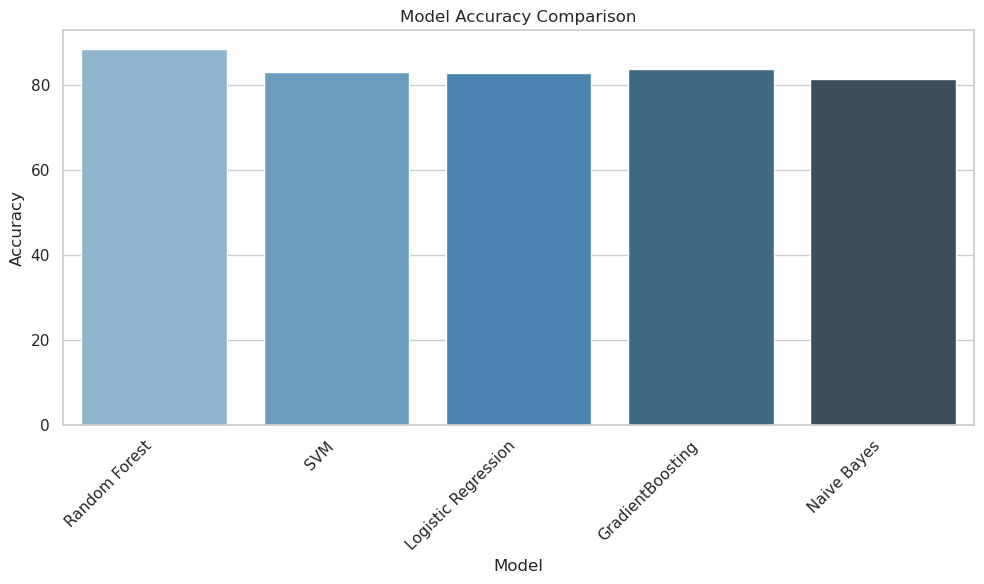

In [54]:
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])
# Step 6: Create the plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.barplot(x='Model', y='Accuracy', data=accuracy_df, palette="Blues_d")
plot.set_title('Model Accuracy Comparison')
plot.set_xlabel('Model')
plot.set_ylabel('Accuracy')
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

In [55]:
passengerId = test_data["PassengerId"]
test_data.drop("PassengerId", axis=1, inplace=True)

# Se você estiver usando um conjunto de teste separado, você também deve escalá-lo
test_data = scaler.transform(test_data)

# Supondo que você tenha os melhores modelos já treinados e armazenados nas variáveis abaixo
best_models = {
    'RandomForest': rf_model.best_estimator_,
    'SVM': grid_search_svm.best_estimator_,
    'LogisticRegression': grid_search_lr.best_estimator_,
    'GradientBoosting': grid_search_gb.best_estimator_,
    'NaiveBayes': grid_search_nb.best_estimator_
}

for name, model in best_models.items():
    # Fazer previsões no conjunto de teste
    test_predictions = model.predict(test_data)

    # Preparar arquivo de submissão
    submission = pd.DataFrame({'PassengerId': passengerId, 'Survived': test_predictions})
    submission.to_csv(f'submissions/submission_{name}.csv', index=False)


In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Definir o número de features que seu modelo irá receber
n_features = X_train.shape[1]

# Inicializar o modelo sequencial
model = Sequential()

# Adicionar a camada de entrada
# Vamos começar com uma camada densa (fully connected) com ativação ReLU
model.add(Dense(64, input_dim=n_features, activation='relu'))

# Adicionar uma camada de Dropout para regularização
model.add(Dropout(0.5))

# Adicionar uma segunda camada densa
model.add(Dense(32, activation='relu'))

# Adicionar outra camada de Dropout
model.add(Dropout(0.5))

# Adicionar a camada de saída
# Como é um problema de classificação binária, usamos 1 neurônio de saída com ativação sigmoid
model.add(Dense(1, activation='sigmoid'))

# Compilar o modelo
# Usaremos o otimizador Adam e a função de perda binary_crossentropy, que é adequada para problemas de classificação binária
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Resumo do modelo
model.summary()

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Treinar o modelo com early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5000,
    batch_size=32,
    callbacks=[early_stopping]
)

# Avaliar o modelo com os dados de validação
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Fazer previsões no conjunto de teste
test_predictions = model.predict(test_data)
test_predictions = (test_predictions > 0.5).astype(int).reshape(-1)  # Convertendo probabilidades em 0 ou 1

# Preparar arquivo de submissão
submission = pd.DataFrame({'PassengerId': passengerId, 'Survived': test_predictions})
submission.to_csv('submissions/submission_neural_network.csv', index=False)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2944      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 13,313
Trainable params: 13,313
Non-trai

Epoch 1/5000
23/23 [==============================] - 2s 30ms/step - loss: 0.6538 - accuracy: 0.6292 - val_loss: 0.5398 - val_accuracy: 0.7821
Epoch 2/5000
23/23 [==============================] - 0s 18ms/step - loss: 0.5379 - accuracy: 0.7542 - val_loss: 0.4778 - val_accuracy: 0.7821
Epoch 3/5000
23/23 [==============================] - 2s 69ms/step - loss: 0.4874 - accuracy: 0.7851 - val_loss: 0.4481 - val_accuracy: 0.7989
Epoch 4/5000
23/23 [==============================] - 0s 16ms/step - loss: 0.4715 - accuracy: 0.7893 - val_loss: 0.4338 - val_accuracy: 0.8156
Epoch 5/5000
23/23 [==============================] - 0s 17ms/step - loss: 0.4382 - accuracy: 0.8160 - val_loss: 0.4282 - val_accuracy: 0.8156
Epoch 6/5000
23/23 [==============================] - 0s 15ms/step - loss: 0.4943 - accuracy: 0.7879 - val_loss: 0.4232 - val_accuracy: 0.8212
Epoch 7/5000
23/23 [==============================] - 1s 24ms/step - loss: 0.4316 - accuracy: 0.8301 - val_loss: 0.4178 - val_accuracy: 0.8268

In [59]:
import optuna
from tensorflow.keras.optimizers import Adam

def create_model(trial):
    # Hiperparâmetros a serem otimizados
    n_layers = trial.suggest_int('n_layers', 1, 3)
    dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-1)
    
    model = Sequential()
    model.add(Dense(trial.suggest_int('n_units_first', 4, 128), activation='relu', input_dim=n_features))
    
    for i in range(n_layers):
        model.add(Dense(trial.suggest_int(f'n_units_{i}', 4, 128), activation='relu'))
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

def objective(trial):
    model = create_model(trial)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,  # Você pode querer usar um número menor de épocas para acelerar a otimização
        batch_size=32,
        callbacks=[early_stopping],
        verbose=0  # Defina como 1 se quiser ver o progresso
    )
    
    # Retorna a melhor validação de perda alcançada pelo modelo.
    return min(history.history['val_loss'])

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)  # Você pode ajustar o número de trials aqui

# Depois de encontrar os melhores hiperparâmetros, você pode recriar e treinar seu modelo com eles
best_params = study.best_trial.params
print('Melhores hiperparâmetros:', best_params)

# Recriar e treinar o modelo com os melhores hiperparâmetros
best_model = create_model(study.best_trial)

# Resumo do modelo
model.summary()

# Treinar o modelo com early stopping
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=5000,
    batch_size=32
)

# Avaliar o modelo com os dados de validação
loss, accuracy = best_model.evaluate(X_val, y_val)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Fazer previsões no conjunto de teste
test_predictions = best_model.predict(test_data)
test_predictions = (test_predictions > 0.5).astype(int).reshape(-1)  # Convertendo probabilidades em 0 ou 1

# Preparar arquivo de submissão
submission = pd.DataFrame({'PassengerId': passengerId, 'Survived': test_predictions})
submission.to_csv('submissions/submission_neural_network.csv', index=False)

[I 2023-11-06 10:15:47,657] A new study created in memory with name: no-name-887fd643-ae48-45a0-bade-d535dbe360a7
[I 2023-11-06 10:16:29,503] Trial 0 finished with value: 0.5309588313102722 and parameters: {'n_layers': 1, 'dropout_rate': 0.4214625178067508, 'learning_rate': 2.9563229623156174e-05, 'n_units_first': 21, 'n_units_0': 21}. Best is trial 0 with value: 0.5309588313102722.
[I 2023-11-06 10:16:40,995] Trial 1 finished with value: 0.40392687916755676 and parameters: {'n_layers': 2, 'dropout_rate': 0.279024416831255, 'learning_rate': 0.008069840663143835, 'n_units_first': 90, 'n_units_0': 114, 'n_units_1': 63}. Best is trial 1 with value: 0.40392687916755676.
[I 2023-11-06 10:17:05,613] Trial 2 finished with value: 0.4764975309371948 and parameters: {'n_layers': 2, 'dropout_rate': 0.41993470297196644, 'learning_rate': 0.0560415686070382, 'n_units_first': 53, 'n_units_0': 85, 'n_units_1': 60}. Best is trial 1 with value: 0.40392687916755676.
[I 2023-11-06 10:19:29,770] Trial 3 fi

Melhores hiperparâmetros: {'n_layers': 2, 'dropout_rate': 0.4950266989571245, 'learning_rate': 0.00018204187815669675, 'n_units_first': 37, 'n_units_0': 62, 'n_units_1': 81}
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               2944      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (De